In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy.sql import func

In [27]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [29]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [30]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [31]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [34]:
# get the names of the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [35]:
# display the row's columns and data in dictionary format (Measurement)
first_row_m = session.query(Measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f441655048>,
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'tobs': 65.0}

In [36]:
# list of column names and types
columns_m = inspector.get_columns('measurement')
for c in columns_m:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [37]:
# query Measurement table and display the first 5 entries
for row in session.query(Measurement.date, Measurement.prcp).limit(5).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)


In [38]:
# display the row's columns and data in dictionary format (Station)
first_row_s = session.query(Station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f44165bcf8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [39]:
# list of column names and types
columns_s = inspector.get_columns('station')
for c in columns_s:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [40]:
# query Measurement table and display the first 5 entries
for row in session.query(Station.station, Station.name).limit(5).all():
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US')
('USC00513117', 'KANEOHE 838.1, HI US')
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('USC00517948', 'PEARL CITY, HI US')
('USC00518838', 'UPPER WAHIAWA 874.3, HI US')


# Exploratory Climate Analysis

In [41]:
# find last date of data
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [42]:
# Calculate the date 1 year ago from the last data point in the database

query_date = dt.date(2017,8,23) - dt.timedelta(days=366)
print("Query Date: ", query_date)

Query Date:  2016-08-22


In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Perform a query to retrieve the data and precipitation scores

twelve_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()
twelve_months

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [44]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

twelve_months_df = pd.DataFrame(twelve_months, columns = ['Date', 'Precip'])

#twelve_months_df = twelve_months_df.groupby(['Date']).sum()
# no groupby
twelve_months_df.set_index('Date', inplace=True)
twelve_months_df.to_csv('twelve_months_out.csv')
twelve_months_df.head()

,Precip
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [45]:
twelve_months_df.dtypes

Precip    float64
dtype: object

In [46]:
#twelve_months_df.head()
#date = twelve_months_df['Date']
precip = twelve_months_df['Precip']
precip.head()

Date
2016-08-23    0.00
2016-08-23    0.15
2016-08-23    0.05
2016-08-23     NaN
2016-08-23    0.02
Name: Precip, dtype: float64

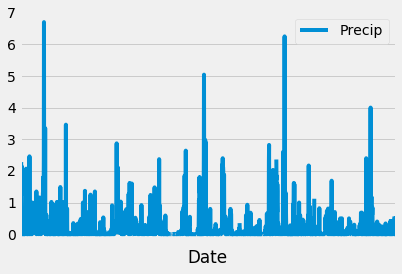

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
twelve_months_df.plot()
plt.xticks([], [])
plt.legend(fontsize=14)

plt.show()


In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats=pd.DataFrame()

stats["count"]=twelve_months_df.count()
stats["sum"]=twelve_months_df.sum()
stats["mean"]=twelve_months_df.mean()
stats["Std.Dev"]=twelve_months_df.std()
stats["min"]=twelve_months_df.min()
stats["max"]=twelve_months_df.max()
stats["mean"]=twelve_months_df.mean()
stats.T

,Precip
count,2021.000000
sum,358.280000
mean,0.177279
Std.Dev,0.461190
min,0.000000
max,6.700000


In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
twelve_months_df.describe()

,Precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [50]:
# Design a query to show how many stations are available in this dataset?
stations_count=session.query(Station.station).count()
print("Number of Stations: ", stations_count)

Number of Stations:  9


In [51]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# all stations
qry = session.query(Measurement.station,
                    func.max(Measurement.tobs), 
                    func.min(Measurement.tobs),
                    func.avg(Measurement.tobs),
                   func.count(Measurement.tobs))
qry = qry.group_by(Measurement.station)
for res in qry.all():
    print(res)

('USC00511918', 87.0, 53.0, 71.61596766043456, 1979)
('USC00513117', 85.0, 59.0, 72.68918420081211, 2709)
('USC00514830', 85.0, 58.0, 74.8732970027248, 2202)
('USC00516128', 84.0, 58.0, 70.91500765696784, 2612)
('USC00517948', 87.0, 58.0, 74.68440233236151, 1372)
('USC00518838', 83.0, 58.0, 72.72407045009784, 511)
('USC00519281', 85.0, 54.0, 71.66378066378067, 2772)
('USC00519397', 87.0, 56.0, 74.55323054331865, 2724)
('USC00519523', 85.0, 56.0, 74.5436493068565, 2669)


In [53]:
station_count = session.query(Measurement).\
    filter(Measurement.station == 'USC00519281').count()
print("Station USC00519281 has {} entries, which is the most".format(station_count))

Station USC00519281 has 2772 entries, which is the most


In [54]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print("Station USC00519281 has Min Temp / Max Temp / Avg Temp values of {}".format(most_active))

Station USC00519281 has Min Temp / Max Temp / Avg Temp values of [(54.0, 85.0, 71.66378066378067)]


In [55]:
# option 2 to achieve the same answer

most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
for m in most_active:
#    print(m)
    min_temp = [m[0] for m in most_active]
    max_temp = [m[1] for m in most_active]
    avg_temp = [m[2] for m in most_active]
print("Station USC00519281 Min Temp: {}".format(min_temp))
print("Station USC00519281 Max Temp: {}".format(max_temp))
print("Station USC00519281 Avg Temp: {}".format(avg_temp))

Station USC00519281 Min Temp: [54.0]
Station USC00519281 Max Temp: [85.0]
Station USC00519281 Avg Temp: [71.66378066378067]


In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#18  Calculate the date 1 year ago from the last data point in the database - updated for USC00519281

ly_date = dt.date(2017,8,18) - dt.timedelta(days=366)
print("Query Date: ", ly_date)

Query Date:  2016-08-17


In [57]:
#19 # Design a query to retrieve the last 12 months of precipitation data and plot the results - updated for USC00519281
# Perform a query to retrieve the data and precipitation scores

USC00519281_twelve_months = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > ly_date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()
USC00519281_twelve_months

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [58]:
## 20 # Save the query results as a Pandas DataFrame


USC00519281_twelve_months_df = pd.DataFrame(USC00519281_twelve_months, columns = ['Date', 'Tobs'])

USC00519281_twelve_months_df.to_csv('USC00519281_twelve_months_out.csv')
USC00519281_twelve_months_df.head()

,Date,Tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


In [59]:
# Sort the dataframe by date

USC00519281_twelve_months_df2 = pd.DataFrame(USC00519281_twelve_months, columns = ['Frequency', 'Tobs'])

USC00519281_twelve_months_df2 = USC00519281_twelve_months_df2.groupby(['Tobs']).count()

USC00519281_twelve_months_df2.sort_values('Tobs')
USC00519281_twelve_months_df2 = USC00519281_twelve_months_df2.reset_index(drop=False)
USC00519281_twelve_months_df2.to_csv('USC00519281_twelve_months2_out.csv')
USC00519281_twelve_months_df2.head()

,Tobs,Frequency
0,59.0,3
1,60.0,2
2,61.0,1
3,62.0,6
4,63.0,4


In [60]:
sorted_df = USC00519281_twelve_months_df.sort_values('Tobs')
sorted_df.head()

,Date,Tobs
174,2017-02-08,59.0
175,2017-02-09,59.0
168,2017-02-02,59.0
169,2017-02-03,60.0
255,2017-04-30,60.0


In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Tobs
count,357.000000
mean,73.196078
std,4.759460
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [62]:
#21 checking data type
sorted_df.dtypes

Date     object
Tobs    float64
dtype: object

In [63]:
# need to group and count the times for each temperature
# example: df['word'].value_counts()
histo_info = sorted_df['Tobs'].value_counts()
histo_info

74.0    39
76.0    33
75.0    33
77.0    31
78.0    23
70.0    22
72.0    22
79.0    20
69.0    19
73.0    18
71.0    18
67.0    15
80.0    12
68.0    12
65.0     7
62.0     6
81.0     5
66.0     5
63.0     4
59.0     3
64.0     3
82.0     3
60.0     2
61.0     1
83.0     1
Name: Tobs, dtype: int64

In [64]:
# df.groupby(['revenue','session','user_id'])['user_id'].count()
sorted_df.groupby(['Tobs'])['Tobs'].count()
sorted_df.head()

,Date,Tobs
174,2017-02-08,59.0
175,2017-02-09,59.0
168,2017-02-02,59.0
169,2017-02-03,60.0
255,2017-04-30,60.0


Text(0, 0.5, 'Frequency')

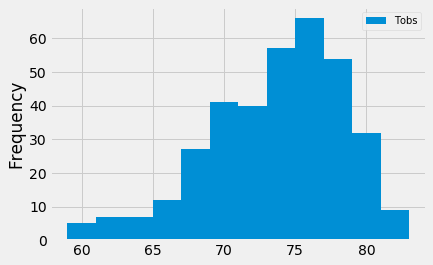

In [65]:
# Use Pandas Plotting with Matplotlib to plot the data

# WORKED WITH JEFF ON THIS CHART 

x = sorted_df['Tobs']
y = sorted_df['Tobs'].value_counts()
plt.hist(x, bins=12)
plt.legend(['Tobs'], loc=1, fontsize=10)
plt.ylabel('Frequency')

In [66]:
USC00519281_twelve_months_df2

,Tobs,Frequency
0,59.0,3
1,60.0,2
2,61.0,1
3,62.0,6
4,63.0,4
5,64.0,3
6,65.0,7
7,66.0,5
8,67.0,15
9,68.0,12


In [67]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [68]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2012-02-28', '2012-03-05')
temps[0]

(62.0, 69.57142857142857, 74.0)

In [69]:
tmin, tavg, tmax = temps[0]
x_range=[tmin, tmax]

In [70]:
print(tmax-tmin)

12.0


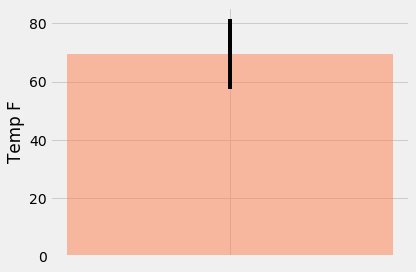

In [71]:
# WORKED WITH JEFF ON THIS CHART

# tmin=63.0
# tavg=71.01515151515152
# tmax=82.0
# x_range=[63.0-82.0]
plt.bar(0, tavg, yerr=(tmax-tmin), tick_label="", color='coral', alpha=0.5)
plt.title=("Trip Avg Temp")
plt.ylabel("Temp F")
plt.tight_layout()
plt.show()


In [72]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#4B

sel = [Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]
merge_report = session.query(*sel).filter(Measurement.station == Station.station).\
  filter(Measurement.date >= '2016-03-18').\
  filter(Measurement.date <= '2016-03-28').\
  group_by(Measurement.station).\
  order_by(func.sum(Measurement.prcp).desc()).all()
merge_report

[('USC00513117', 4.6899999999999995, 21.4234, -157.8015, 14.6),
 ('USC00519281', 1.17, 21.45167, -157.84888999999998, 32.9),
 ('USC00519523', 1.11, 21.33556, -157.71139, 19.5),
 ('USC00514830', 0.9400000000000001, 21.5213, -157.8374, 7.0),
 ('USC00516128', 0.48, 21.3331, -157.8025, 152.4),
 ('USC00519397', 0.10999999999999999, 21.2716, -157.8168, 3.0),
 ('USC00517948', None, 21.3934, -157.9751, 11.9)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
